In [1]:
%matplotlib notebook
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import timeit

In [4]:
class PaulRudd(object):
    def __init__(self, n, w, h):
#         self._dirList = np.array([[0,1], [-1, 0], [0, -1], [1, 0]])
        self._dirList = np.array([[0, -1], [1, 0], [0,1], [-1, 0]])
        self._w = w
        self._h = h
        self.board = np.zeros((w, h))
        self.n = n
        self.pos = np.zeros(shape=(n, 2), dtype=np.int64)
        self.didx = np.empty(shape=n, dtype=np.int64)
        self.dir = np.empty(shape=(n, 2), dtype=np.int64)
        
    @property
    def i(self):
        return self.pos[:,0]
    
    @property
    def j(self):
        return self.pos[:,1]
    
    def move(self, i):
        self.pos[i] += self.dir[i]
        self.i[i] %= self._w
        self.j[i] %= self._h
    
    def rotateRight(self, i):
        self.didx[i] = (self.didx[i]-1)%4
        self.dir[i] = self._dirList[self.didx[i]]
    
    def rotateLeft(self, i):
        self.didx[i] = (self.didx[i]+1)%4
        self.dir[i] = self._dirList[self.didx[i]]

@jit
def updateBoard(board, pr):
    newBoard = np.copy(board)
    for i in range(pr.n):
        if board[pr.i[i], pr.j[i]] == 0:
            newBoard[pr.i[i], pr.j[i]] = 1
            pr.rotateRight(i)
        elif board[pr.i[i], pr.j[i]] == 1:
            newBoard[pr.i[i], pr.j[i]] = 0
            pr.rotateLeft(i)
        pr.move(i)
    return newBoard

@jit
def prMark(board, pr):
    dispBoard = np.copy(board)
    for i in range(pr.n):
        dispBoard[pr.i[i],pr.j[i]] = 2
    return dispBoard
            

<IPython.core.display.Javascript object>


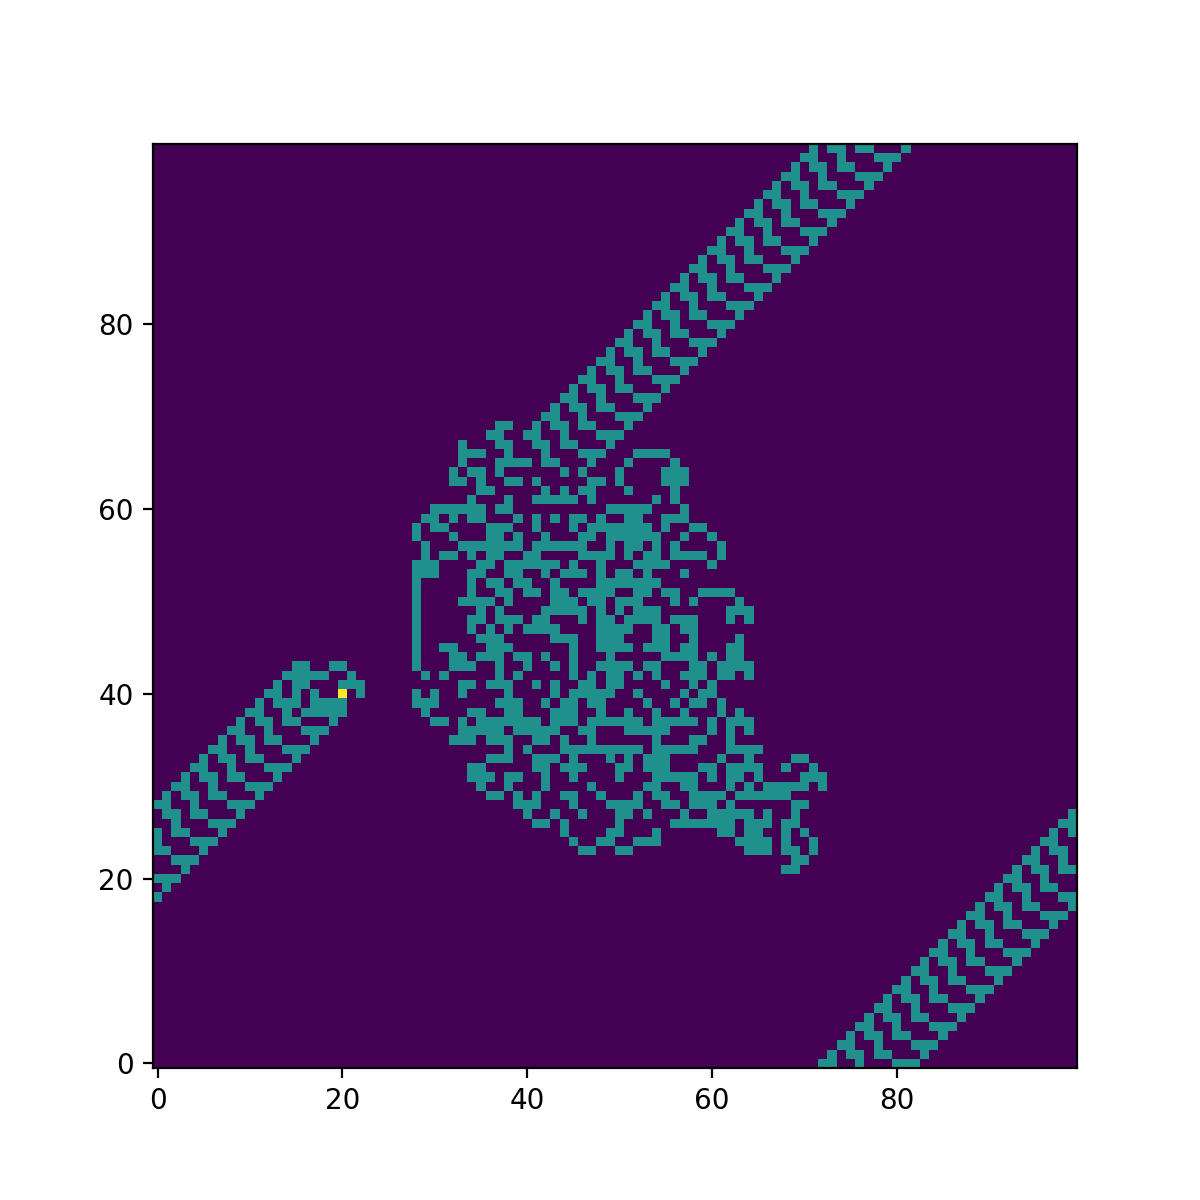

[[ 0 -1]]


In [12]:
fig = plt.figure(figsize=(6,6))
# create the random board
w = 100
h = 100
board = np.zeros((w, h), dtype=np.int64)
pr = PaulRudd(1, w, h)
pr.pos[0] = [w//2,h//2]
pr.didx[0] = 0
pr.dir[0] = pr._dirList[pr.didx[0]]
# pr.pos[0] = [np.random.randint(w), np.random.randint(h)]
# pr.didx[0] = np.random.randint(4)
# pr.dir[0] = pr._dirList[pr.didx[0]]

# pr.pos[1] = [w//4,3*h//4]
# pr.didx[1] = 0
# pr.dir[1] = pr._dirList[pr.didx[1]]
# pr.pos[1] = [np.random.randint(w), np.random.randint(h)]
# pr.didx[1] = np.random.randint(4)
# pr.dir[1] = pr._dirList[pr.didx[1]]

# pr.pos[2] = [3*w//4,h//4]
# pr.didx[2] = 0
# pr.dir[2] = pr._dirList[pr.didx[2]]
# pr.pos[2] = [np.random.randint(w), np.random.randint(h)]
# pr.didx[2] = np.random.randint(4)
# pr.dir[2] = pr._dirList[pr.didx[2]]

# pr.pos[3] = [3*w//4,3*h//4]
# pr.didx[3] = 0
# pr.dir[3] = pr._dirList[pr.didx[3]]
# pr.pos[3] = [np.random.randint(w), np.random.randint(h)]
# pr.didx[3] = np.random.randint(4)
# pr.dir[3] = pr._dirList[pr.didx[3]]

print(pr.dir)

im = plt.imshow(board, animated=True, vmin=0, vmax=2, origin="lower")

# for i in range(52):
#     board = updateBoard(board, pr)
# dispBoard = np.copy(board)
# dispBoard[pr.i[0], pr.j[0]] = 2

# im = plt.imshow(dispBoard, animated=True)

def updatefig(*args):
    global board, dispBoard, pr
    for i in range(100):
        board = updateBoard(board, pr)
        dispBoard = prMark(board, pr)
    # update the image
    im.set_array(dispBoard)
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=10, blit=True)
# ani = animation.FuncAnimation(fig, updatefig, interval=10, save_count=1000, blit=True)
# ani.save("ant.mp4", fps=30)
plt.show()